# This notebook covers the process of cleaning "Google Play Store.csv" dataset. Edited by Nguyen Hanh Tu

## Are you ready to rumbllllllllllllllle?  Let's go

# 1. Import the dataset, and create the dataframe


In [0]:
# We need the following libraries: io, numpy, pandas, seaborn and mathplotlib.

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Next, we use pandas to put our dataset into a dataframe. 
df=pd.read_csv('/content/drive/My Drive/google-play-store.csv')
df.head()

# 2. Clean the dataframe

## 2.1 Clean column "Category"

In [0]:
# Check the unique data to see outliners and nones.

df["Category"].value_counts()

# There is one line that has category of 1.9, which looks like a distortion data. So this one should be removed


In [0]:
# Create new dataframe with no category "1.9"

df = df[df.Category != "1.9"]


In [0]:
df["Category"].value_counts()
df.csv_

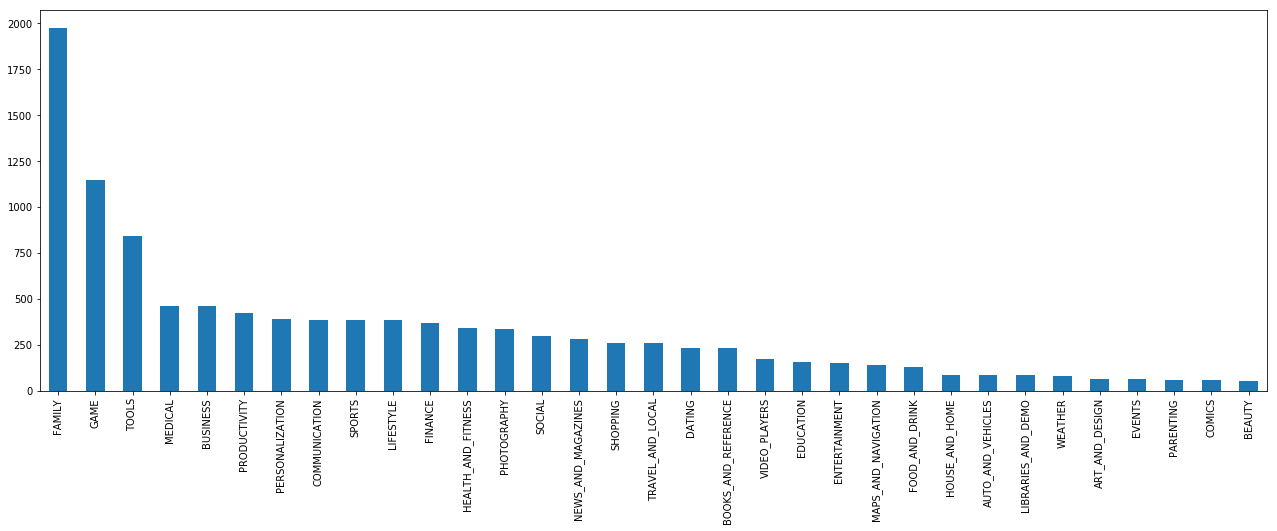

In [5]:
df.Category.value_counts().plot(kind='bar', figsize=(22,7))

### After removing the "1.9" column, we can move ahead.



In [0]:
# %%HTML
# <div>
# <h3 style="text-align:center;">After removing the "1.9" column, we can move ahead.</h3>
# </div>

## 2.2. Clean column "Rating"

In [0]:
df["Rating"].value_counts()

In [0]:
print("Range: ", df.Rating.min(),"-",df.Rating.max())
df.Rating.dtype

In [9]:
print(df.Rating.isna().sum(),"none values out of", len(df.Rating))

1474 none values out of 10840


Text(0, 0.5, 'Frequency')

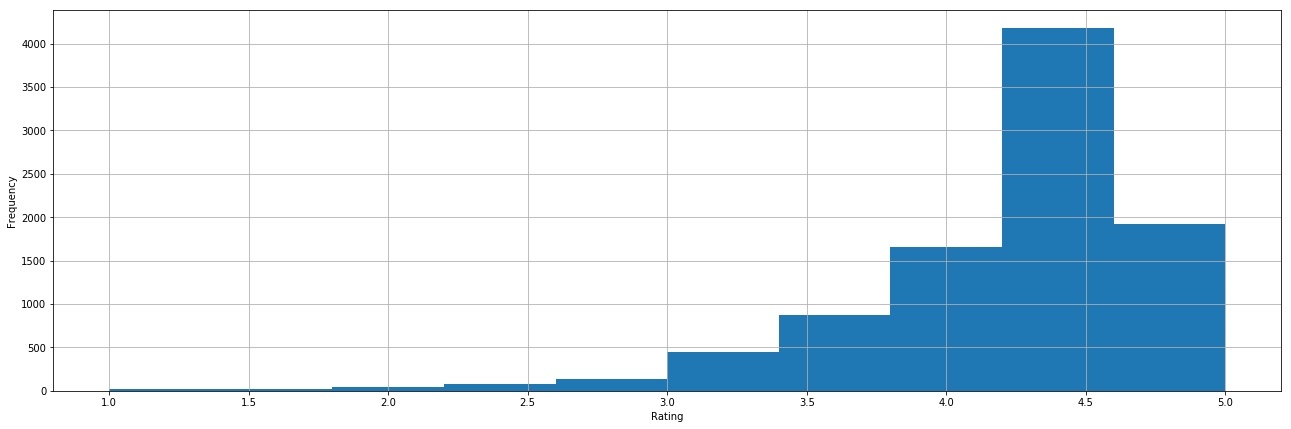

In [10]:
df.Rating.hist(figsize=(22,7));
plt.xlabel('Rating')
plt.ylabel('Frequency')

### Look like there are no need to clean this column.

## 2.3 Check column "Reviews"

In [0]:
df["Reviews"].value_counts()

# This column has no outliners or missing values.

In [11]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### this column is clean enough.

## 2.4 Check column "Size"

In [0]:
df["Size"].value_counts()

# There are distortion in the data, some have K as the size, others have M

In [0]:
# convert Size to MB, replace "varies with devices" by mean of the column.
def convert_size_to_num_in_mb(x):
  if "k" in x:
    x = round(float(x.replace("k", ""))/1000, 0)
  elif "M" in x:
    x = round(float(x.replace("M", "")), 0)
  elif x == "Varies with device":
    x = None
  return x

In [0]:
df["Size"]=df["Size"].apply(convert_size_to_num_in_mb)

In [0]:
df["Size"].unique()


In [0]:
# Change NaN into mean of the colummn
df["Size"].fillna(df["Size"].mean(), inplace=True)
df["Size"]=round(df["Size"],0)
df["Size"].unique()




Text(0, 0.5, 'Frequency')

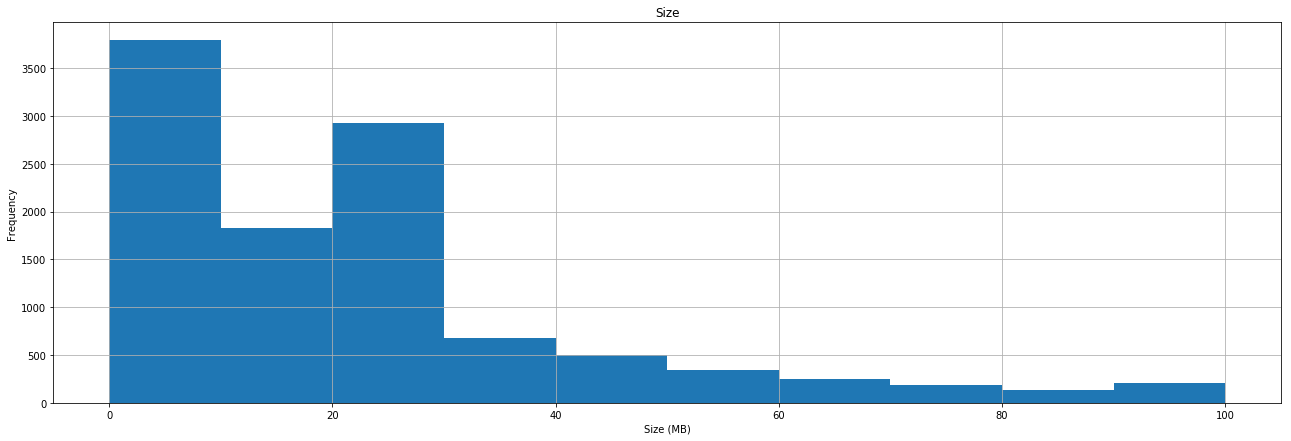

In [16]:
df.hist(column='Size', figsize=(22,7))
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')

## 2.4 Check column "Installs"

In [0]:
df["Installs"].value_counts()

In [0]:
# Remove "+" and "," in Installs column. Then convert this column into integer

def remove_plus_and_comma(x):
    x = str(x).replace("+", "").replace(",", "")
    return int(x)
df["Installs"] = df["Installs"].apply(remove_plus_and_comma)
df["Installs"].value_counts()

## 2.5 Check column "Type"

In [0]:
df["Type"].value_counts()

## 2.6 Check column "Price"

In [101]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
def remove_dollar(x):
  x = x.replace('$', '')
  return float(x)
df['Price']=df['Price'].apply(remove_dollar)
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Text(0, 0.5, 'Frequency')

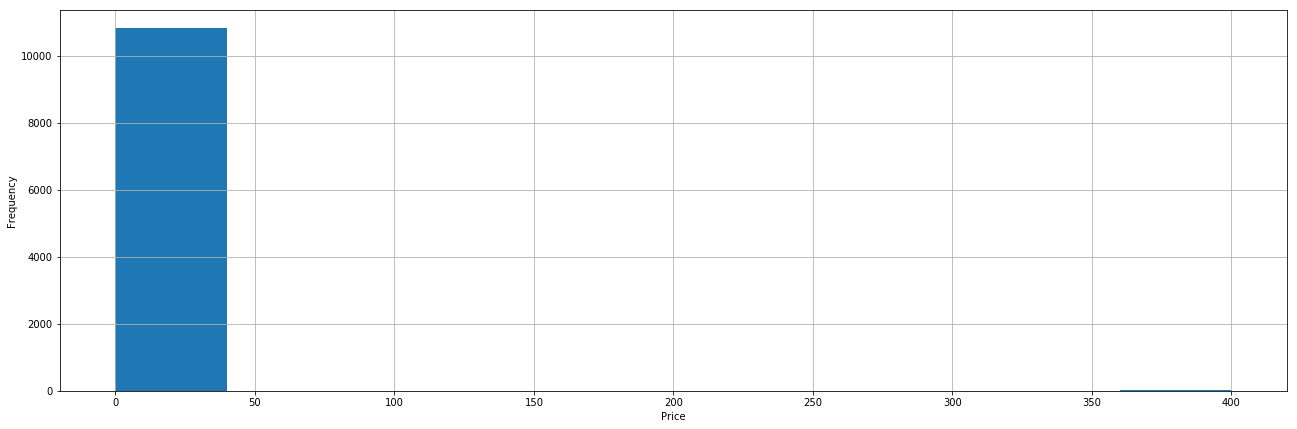

In [19]:
df.Price=pd.to_numeric(df.Price)
df.Price.hist(figsize=(22,7));
plt.xlabel('Price')
plt.ylabel('Frequency')

In [21]:
temp=df.Price.apply(lambda x: True if x>350 else False)
df[temp]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,2.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,2.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,9.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,5.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,3.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,1.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,3.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


## 2.7 Check column "Content Rating

In [105]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

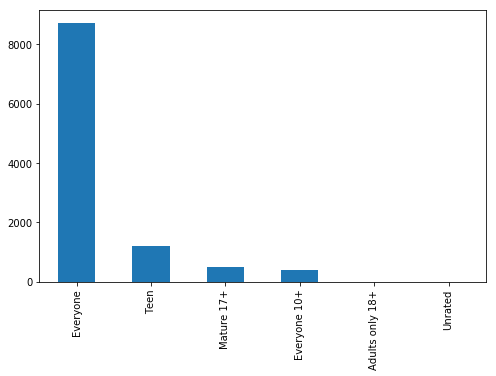

In [22]:
df['Content Rating'].value_counts().plot(kind='bar', figsize=(8,5))

## 2.8 Check column "Genres"

In [106]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [0]:
# Split "Genres" column into two column. The first column is for the first genres, we named it as primary genres. The other one is named sub genres.
primary_gen = df['Genres'].apply(lambda x: x.split(';')[0])
df['Primary Genres'] = primary_gen
df['Primary Genres']

In [27]:
df['Secondary Genres']= df.Genres.apply(lambda x: x.split(';')[-1])
df['Secondary Genres'].unique()



array(['Art & Design', 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Communication', 'Dating', 'Education', 'Music & Video',
       'Brain Games', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Arcade', 'Casual', 'Card',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Simulation', 'Adventure', 'Board', 'Trivia',
       'Role Playing', 'Medical', 'Social', 'Shopping', 'Photography',
       'Travel & Local', 'Tools', 'Personalization', 'Productivity',
       'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [32]:
grouped_gen = df.groupby(['Primary Genres','Secondary Genres'])
grouped_gen.size()



Primary Genres           Secondary Genres       
Action                   Action                     365
                         Action & Adventure          17
Adventure                Action & Adventure          13
                         Adventure                   75
                         Brain Games                  1
                         Education                    2
Arcade                   Action & Adventure          16
                         Arcade                     220
                         Pretend Play                 1
Art & Design             Action & Adventure           2
                         Art & Design                58
                         Creativity                   7
                         Pretend Play                 2
Auto & Vehicles          Auto & Vehicles             85
Beauty                   Beauty                      53
Board                    Action & Adventure           3
                         Board                       44

In [0]:
two_genres_table = pd.crosstab(index=df["Primary Genres"],columns=df["Secondary Genres"])
two_genres_table.head()

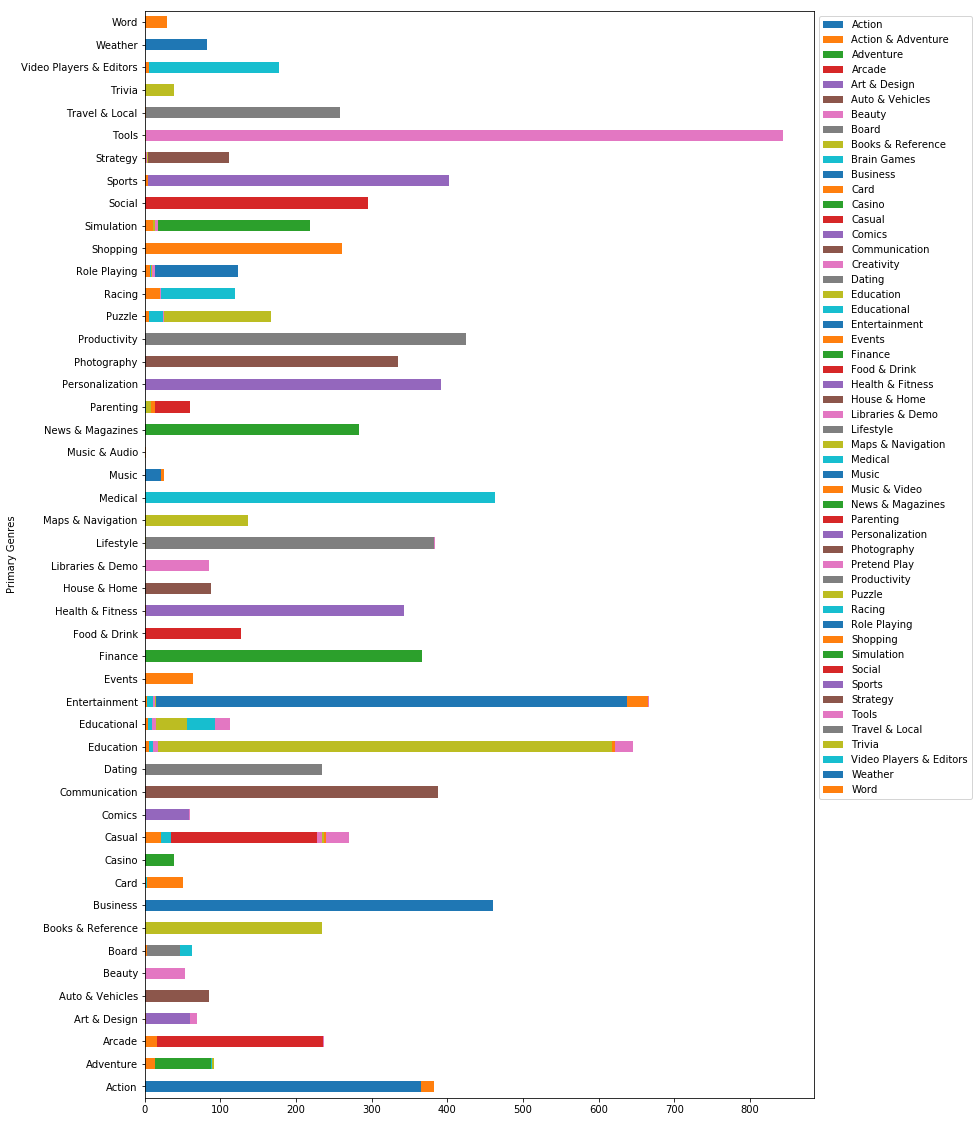

In [36]:
two_genres_table.plot(kind="barh", figsize=(12,20),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

## 2.10 Clean column "Last Update"

In [40]:
df['Last Updated'].value_counts()
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [49]:
from datetime import datetime,date
temp=pd.to_datetime(df['Last Updated'])
temp.head()

df['Time from last update'] = temp.apply(lambda x:date.today()-datetime.date(x))
df['Time from last update'].head()

0   572 days
1   564 days
2   366 days
3   420 days
4   408 days
Name: Time from last update, dtype: timedelta64[ns]

In [0]:
plt.figure(figsize=(15,6))
ax = sns.pairplot(df, hue="Type")
plt.show()

# 2.11 Current Ver

In [46]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [47]:
df['Current Ver'].isna().sum()

8

In [48]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Primary Genres,Secondary Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,3.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,6.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Art & Design,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Art & Design,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Art & Design,Creativity


In [0]:
# 2. 11 

In [0]:
# df[['pahun_1','pahun_2']]=df['Genres'].str.split(';', expand=True,n=1)


In [0]:
# df['genres'].unique()

In [0]:

# df["Price"] = df["Price"].apply(convert_dollar_to_none)
# df["Price"].unique()

In [0]:
# # convert reviews to float
# df['Reviews'] = df['Reviews'].apply(lambda x: float(x))
# df['Reviews']

In [0]:
# import tkinter as tk
# from tkinter import filedialog
# from pandas import DataFrame

# root= tk.Tk()

# canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
# canvas1.pack()

# def exportCSV ():
#     global df
    
#     export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
#     df.to_csv (export_file_path, index = None, header=True)

# saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
# canvas1.create_window(150, 150, window=saveAsButton_CSV)

# root.mainloop()

In [0]:
# df.to_csv('/content/drive/My Drive/e.csv')

In [0]:
# df['Genres2']=df['Genres'].split(";")

# df


Text(0, 0.5, 'Category')

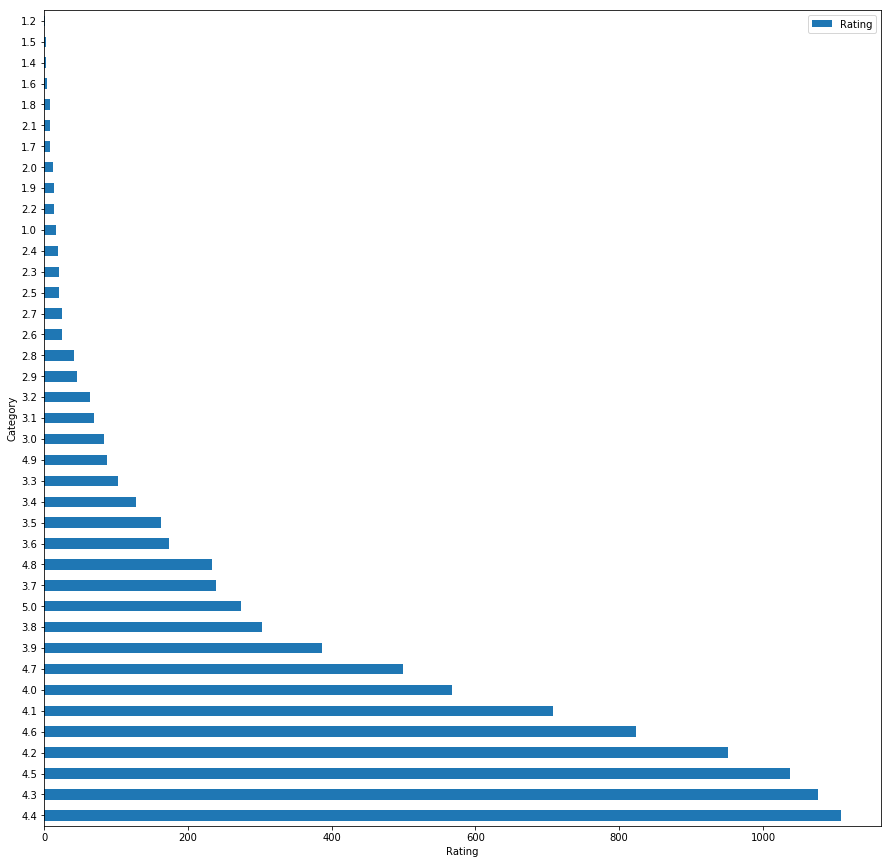

In [153]:
import os
df['Rating'].value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xlabel('Rating')
plt.ylabel('Category')

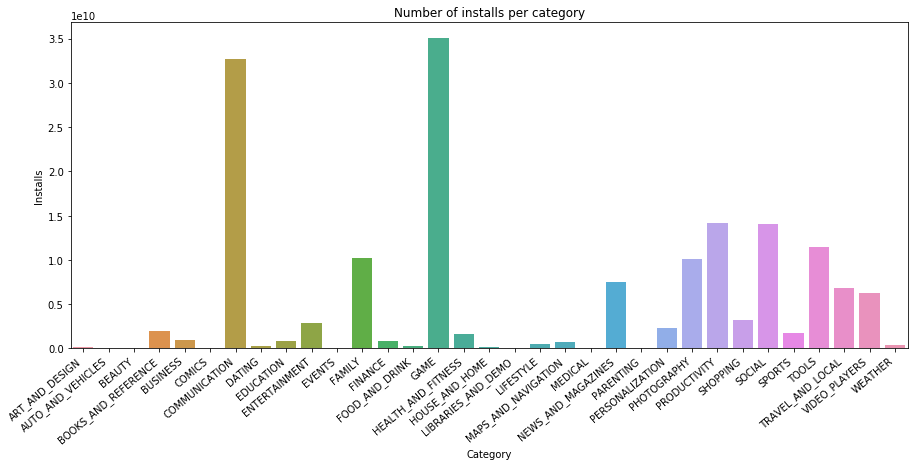

In [155]:
# Number of install per category

plt.figure(figsize = (15, 6))
plt.title('Number of installs per category')
install_per_category = df.groupby("Category")['Installs'].sum().reset_index()
ax = sns.barplot(x="Category", y="Installs", data=install_per_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

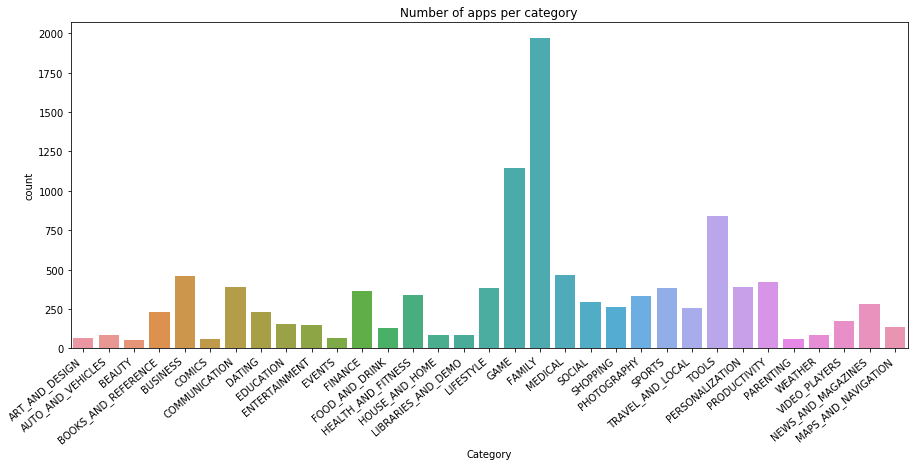

In [158]:
# Number of apps per category
plt.figure(figsize=(15,6))
plt.title('Number of apps per category')
ax = sns.countplot(x='Category',data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

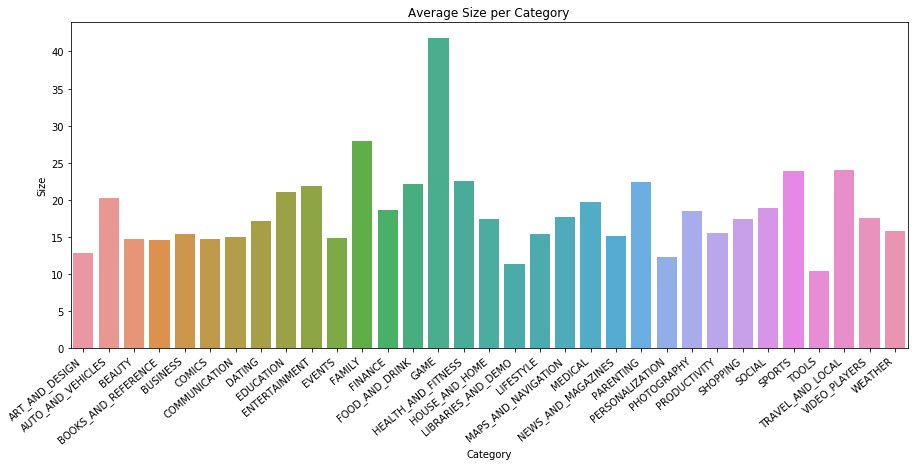

In [160]:
plt.figure(figsize = (15, 6))
plt.title('Average Size per Category')
size_per_category = df.groupby("Category")['Size'].mean().reset_index()
ax = sns.barplot(x="Category", y="Size", data=size_per_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

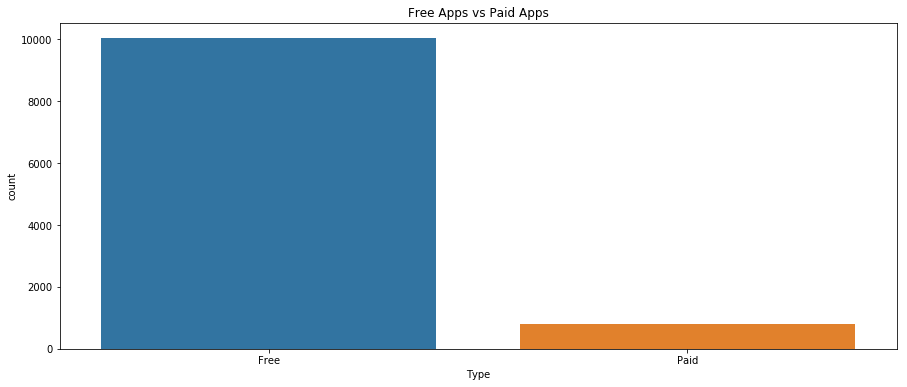

In [164]:
plt.figure(figsize=(15,6))
plt.title('Free Apps vs Paid Apps')
ax = sns.countplot(x='Type',data = df)
plt.show()

In [166]:
print("Percentage of free apps: ", round(len(df[df['Type'] == "Free"])/len(df)*100, 2))

Percentage of free apps:  92.61


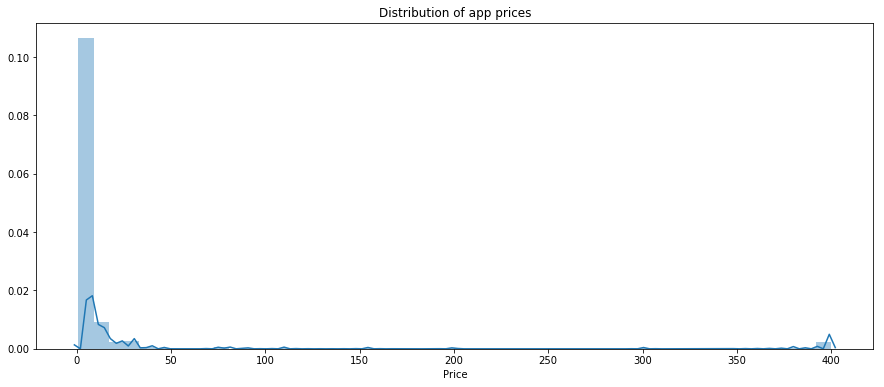

In [167]:
paid_apps = df[df['Price']!=0]
plt.figure(figsize=(15,6))
plt.title('Distribution of app prices')
ax = sns.distplot(paid_apps['Price'])
plt.show()

In [168]:
paid_apps[paid_apps['Price'] >= 300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,2.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,2.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,9.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,5.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,3.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,1.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,3.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


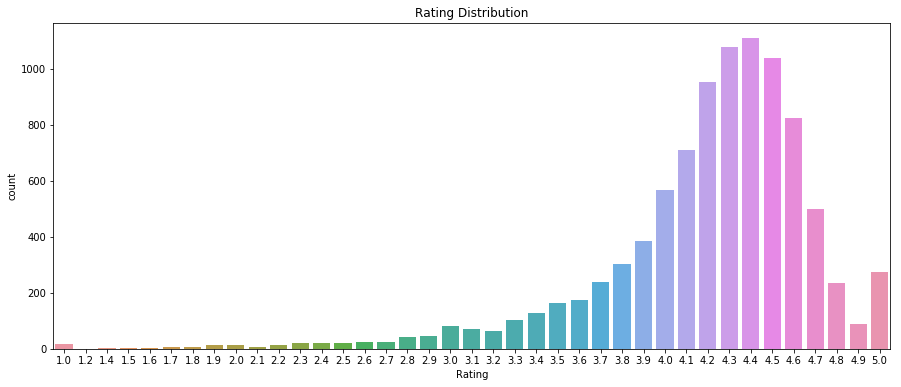

In [171]:
plt.figure(figsize=(15,6))
plt.title('Rating Distribution')
ax = sns.countplot(x='Rating', data=df)
plt.show()